[Viznet](https://viznet.readthedocs.io/en/latest/index.html) 基于 matplotlib, 定义了一套简单的「笔刷规则」, 具体如下:

In [ ]:
from viznet import NodeBrush, EdgeBrush, DynamicShow

with DynamicShow() as d:
    brush = NodeBrush('nn.input', size='normal')
    node1 = brush >> (1, 0)   # 以坐标  (1, 0)  为中心绘制节点
    node2 = brush >> (2, 0)
    edge = EdgeBrush('->-', lw=2)
    edge >> (node1, node2)  # 以直线连接两个节点
    node1.text('$x_1$', 'center', fontsize=18)  # add text to node1
    node2.text('$y_1$', 'center', fontsize=18)

`brush` 的第一个参数 `nn.*` 表示节点的样式，具体参考: [The Neural Network Zoo](http://www.asimovinstitute.org/neural-network-zoo/)

In [ ]:
class Bunch(dict):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.__dict__ = self

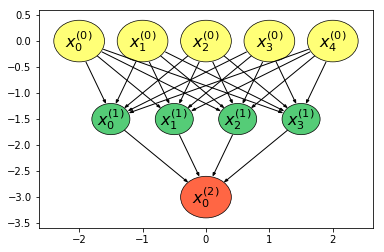

In [33]:
import numpy as np
from viznet import connecta2a, node_sequence, NodeBrush, EdgeBrush, DynamicShow

num_node_list=[5, 4, 1]

num_hidden_layer = len(num_node_list) - 2  # 隐藏层数
kind_list = ['nn.input'] + ['nn.hidden'] * num_hidden_layer + ['nn.output']
radius_list = [0.4] + [0.3] * num_hidden_layer + [0.4]
y_list = -1.5 * np.arange(len(num_node_list))  # 每一层节点所在的位置的纵轴坐标
seq_list = []
for n, kind, radius, y in zip(num_node_list, kind_list, radius_list, y_list):
    b = NodeBrush(kind, size=radius)
    seq_list.append(node_sequence(b, n, center=(0, y)))
    
eb = EdgeBrush('-->')
for st, et in zip(seq_list[:-1], seq_list[1:]):
    connecta2a(st, et, eb)
    
for i, layer_nodes in enumerate(seq_list):
    [node.text('$x_%i^{(%i)}$'%(j, i), 'center', fontsize=16) for j, node in enumerate(layer_nodes)]

Press `c` to save figure to "_feed_forward.png", `Ctrl+d` to break >>
> c:\programdata\anaconda3\lib\site-packages\viznet\context.py(45)__exit__()
-> plt.savefig(self.filename, dpi=300)
(Pdb) c


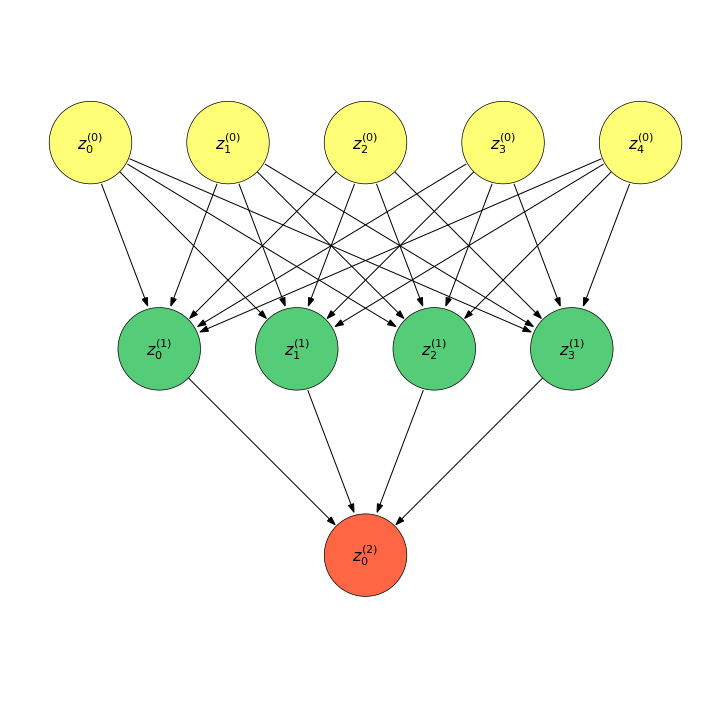

In [37]:
import numpy as np
from viznet import connecta2a, node_sequence, NodeBrush, EdgeBrush, DynamicShow


def draw_feed_forward(ax, num_node_list):
    '''
    draw a feed forward neural network.

    Args:
        num_node_list (list<int>): 每层节点数组成的列表
    '''
    num_hidden_layer = len(num_node_list) - 2  # 隐藏层数
    token_list = ['\sigma^z'] + \
        ['y^{(%s)}' % (i + 1) for i in range(num_hidden_layer)] + ['\psi']
    kind_list = ['nn.input'] + ['nn.hidden'] * num_hidden_layer + ['nn.output']
    radius_list = [0.3] + [0.2] * num_hidden_layer + [0.3]   # 半径大小
    y_list = - 1.5 * np.arange(len(num_node_list))  # 每一层节点所在的位置的纵轴坐标，全取负值说明网络是自顶而下的
    
    seq_list = []
    for n, kind, radius, y in zip(num_node_list, kind_list, radius_list, y_list):
        b = NodeBrush(kind, ax)
        seq_list.append(node_sequence(b, n, center=(0, y)))

    eb = EdgeBrush('-->', ax)
    for st, et in zip(seq_list[:-1], seq_list[1:]):
        connecta2a(st, et, eb)
    for i, layer_nodes in enumerate(seq_list):
        [node.text('$z_%i^{(%i)}$'%(j, i), 'center', fontsize=16) for j, node in enumerate(layer_nodes)]


def real_bp():
    with DynamicShow((10, 10), '_feed_forward.png') as d:  # 隐藏坐标轴
        draw_feed_forward(d.ax, num_node_list=[5, 4, 1])


if __name__ == '__main__':
    real_bp()

概率图的矢量表示:

$$
P(z^{(0)}, z^{(1)}, z^{(2)}) = P(z^{(0)})P(z^{(1)}|z^{(0)})P(z^{(2)}|z^{(1)})
$$

其中

$$
\begin{aligned}
&P(z^{(0)}) = \begin{bmatrix}P(z_0^{(0)}), P(z_1^{(0)}), P(z_2^{(0)}),P(z_3^{(0)}), P(z_4^{(0)})\end{bmatrix}\\
&P(z^{(2)}) = \left[ P(z_0^{(0)})\right]\\
&P(z^{(1)}|z^{(0)}) =
\begin{bmatrix}
P(z_0^{(1)}|z_0^{(0)}) & \cdots & P(z_3^{(1)}|z_0^{(0)})\\
\vdots & \ddots & \vdots\\
P(z_0^{(1)}|z_4^{(0)}) & \cdots & P(z_3^{(1)}|z_4^{(0)})\\
\end{bmatrix}\\
&P(z^{(2)}|z^{(1)}) = \left[P(z_0^{(2)}|z_0^{(1)}), \cdots, P(z_0^{(2)}|z_3^{(1)}) \right]
\end{aligned}
$$